In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import tweets_analysis as twa

In [2]:
# import importlib
# importlib.reload(twa)

In [3]:
# global settings to improve matplotlib output

plt.rcParams['figure.figsize'] = (21,9)

# General settings
* CHUNKSIZE : to decrease only if memory errors occur
* path: path to your CSV file (or folder with CSV files inside)
* user, tlang, ulang: filter analysis on user, tweet language or users' account language

In [4]:
CHUNKSIZE = 1000000

path='../spain_082019_tweets_csv_hashed.csv'

user = None
tlang = None
ulang = None

# Read and process all your CSV files

In [5]:
df_reader = twa.read_list_of_csv(twa.find_csv(path), chunksize=CHUNKSIZE)

In [6]:
# Prepare empty lists that will be progressively filled with data as we read chunks of files
df_tweets_stats = []
df_heatmaps = []
df_client_hist = []
df_lang_hist = []
df_accounts_per_month = []
list_rtw_usernames = ['']
list_hashtags = ['']

lines_read = 0
for df in df_reader:
    tweets_stats, heatmap_df, client_hist, lang_hist, \
        accounts_per_month, rtw_usernames, hashtags = twa.process_one_chunk(df, user=user, tlang=tlang, ulang=ulang)

    df_tweets_stats.append(tweets_stats)
    df_heatmaps.append(heatmap_df)
    df_client_hist.append(client_hist)
    df_lang_hist.append(lang_hist)
    df_accounts_per_month.append(accounts_per_month)
    list_rtw_usernames.extend(rtw_usernames)
    list_hashtags.extend(hashtags)

    lines_read += CHUNKSIZE
    print(f'{lines_read} tweets read')

# Put everything together
df_tweets_stats = pd.concat(df_tweets_stats)
df_heatmaps = pd.concat(df_heatmaps)
df_client_hist = pd.concat(df_client_hist)
df_lang_hist = pd.concat(df_lang_hist)
df_accounts_per_month = pd.concat(df_accounts_per_month)
list_rtw_usernames = ' '.join(list_rtw_usernames)
list_hashtags = ' '.join(list_hashtags)

1000000 tweets read


# Charts
#### (when using jupyter notebook, remember to use plot functions with argument "show_chart=True")

## Density map of tweets over the day and hours of the day

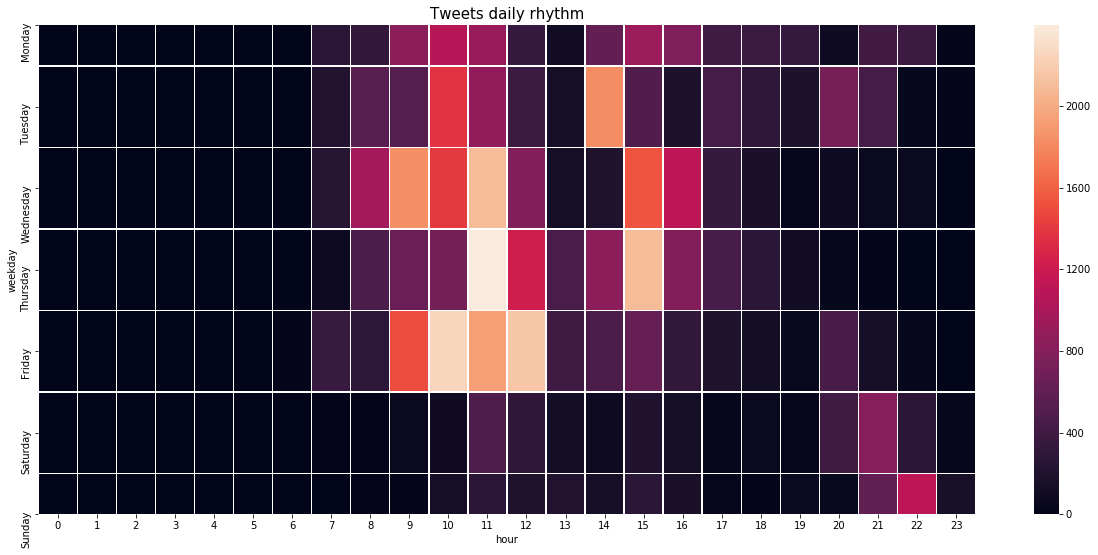

In [7]:
twa.plot_heatmap(df_heatmaps, show_chart=True)

## Plot tweets vs retweets over time

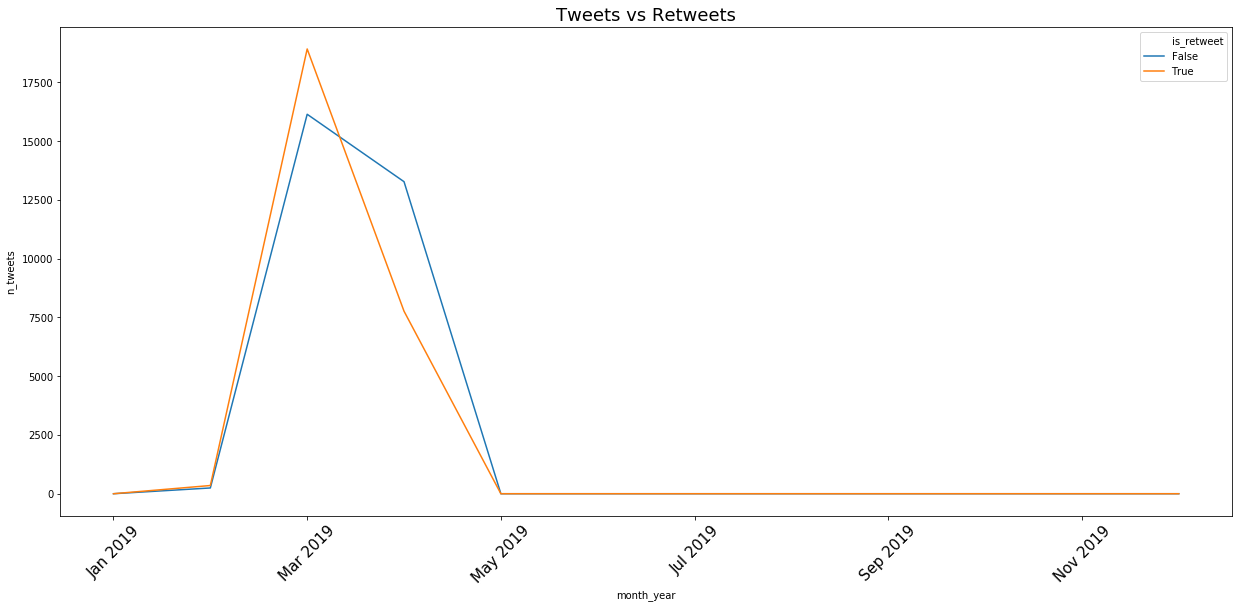

In [8]:
twa.plot_tweets_vs_retweets(df_tweets_stats, show_chart=True)

## Plot tweets by interaction type

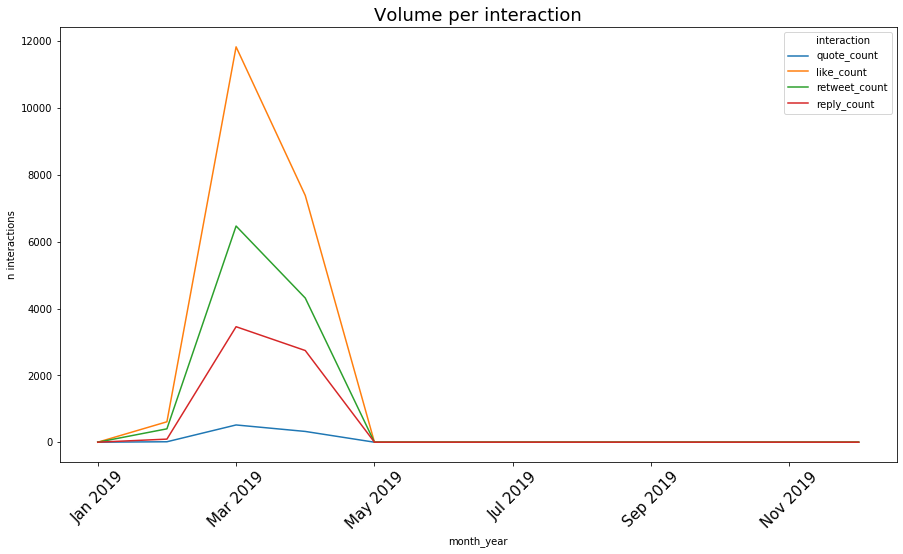

In [9]:
twa.plot_interactions(df_tweets_stats,show_chart=True)

## Bar chart with number of accounts created per month

<BarContainer object of 12 artists>

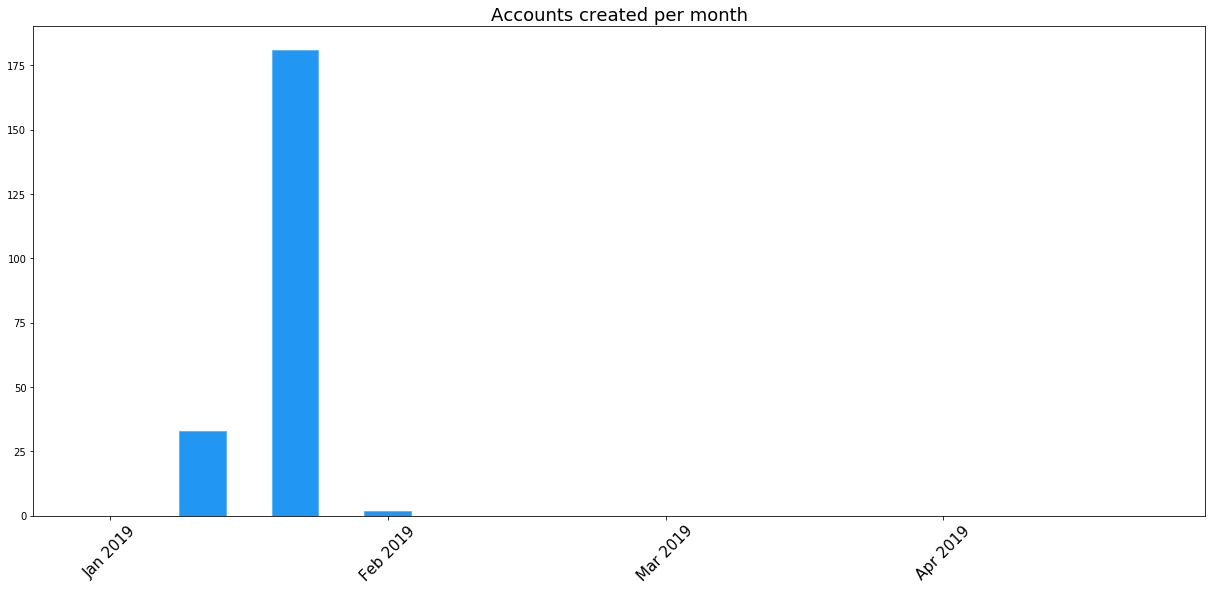

In [10]:
twa.plot_accounts_created_per_month(df_accounts_per_month, show_chart=True)

## Bar chart showing the most popular languages

<BarContainer object of 31 artists>

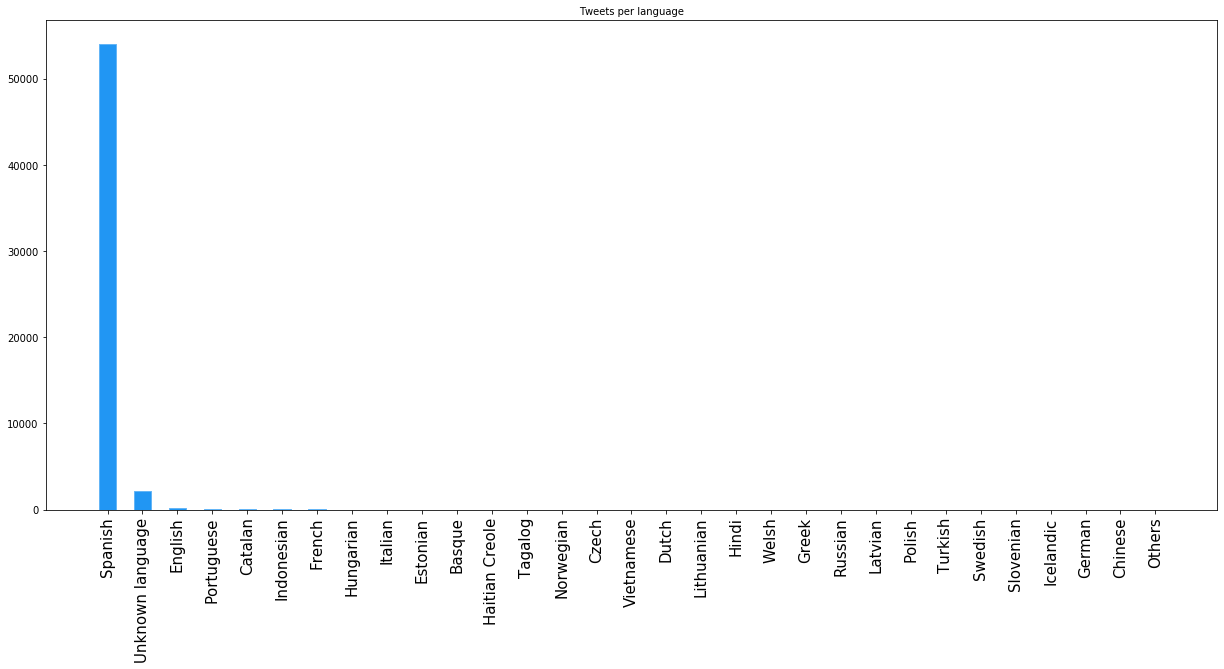

In [11]:
twa.plot_language_histogram(df_lang_hist, show_chart=True)

## Bar chart showing the most used Twitter clients

<BarContainer object of 9 artists>

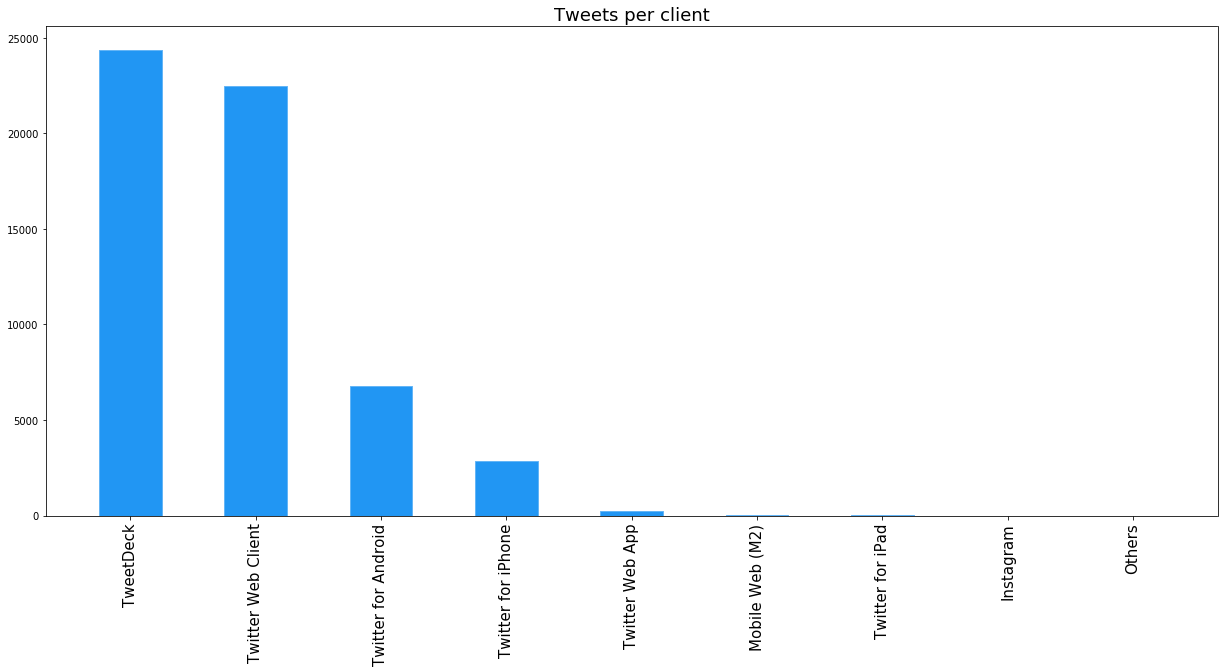

In [12]:
twa.plot_client_histogram(df_client_hist, show_chart=True)

## Most retweeted users

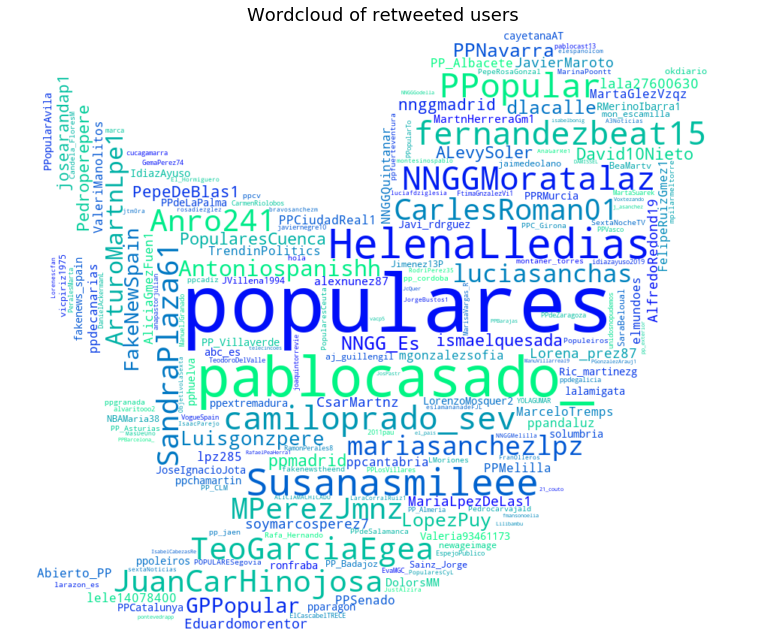

In [13]:
twa.plot_wordcloud_retweets(list_rtw_usernames, show_chart=True)

## Most popular hashtags

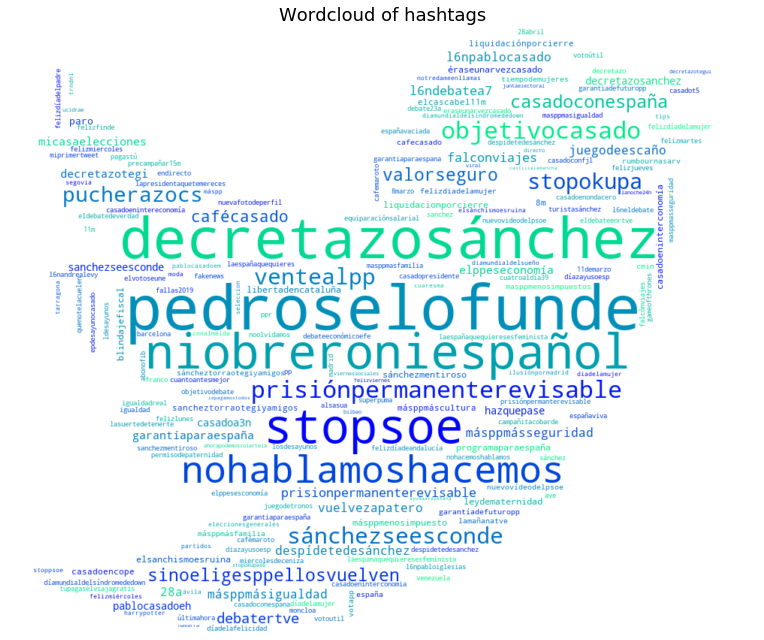

In [14]:
twa.plot_wordcloud_hashtags(list_hashtags, show_chart=True)